# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D ,Dense

from keras.models import Sequential, Model
import IPython.display as ipd
import resampy
import glob

In [2]:
librosa.version.version

'0.10.1'

# Setting labels

In [3]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
FEMALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\females"

In [4]:
male_list = glob.glob(MALE_DATA + "\\*.wav")
female_list = glob.glob(FEMALE_DATA + "\\*.wav")

In [5]:
# merge male_list and female_list
mylist = male_list.copy()
mylist.extend(female_list)


In [6]:
print(male_list[100])
print(female_list[100])

D:\VoiceClone\OtherProject\VoxCeleb_gender\males\1088.wav
D:\VoiceClone\OtherProject\VoxCeleb_gender\females\1088.wav


In [7]:
type(male_list)

list

In [8]:
gender_list = []
for item in male_list:
    gender_list.append("male")
for item in female_list:
    gender_list.append("female")

In [9]:
labels = pd.DataFrame(gender_list)

In [10]:
labels[:10]

,0
0,male
1,male
2,male
3,male
4,male
5,male
6,male
7,male
8,male
9,male


# Getting the features of audio files using librosa

In [11]:
df =pd.DataFrame(columns=['feature'])
bookmark = 0

for index, y in enumerate(mylist):
    print(bookmark)
    X, sr = librosa.load(y, res_type='kaiser_fast', duration=2.75, sr=22050*2, offset=0.5)
    sr = np.array(sr)
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                         sr=sr,
                                         n_mfcc=13),
                    axis=0)
    features = mfccs
    df.loc[bookmark] = [features]
    bookmark=bookmark+1

0


2048
2.2675736961451248e-05
1
2048
2.2675736961451248e-05
2
2048
2.2675736961451248e-05
3
2048
2.2675736961451248e-05
4
2048
2.2675736961451248e-05
5
2048
2.2675736961451248e-05
6
2048
2.2675736961451248e-05
7
2048
2.2675736961451248e-05
8
2048
2.2675736961451248e-05
9
2048
2.2675736961451248e-05
10
2048
2.2675736961451248e-05
11
2048
2.2675736961451248e-05
12
2048
2.2675736961451248e-05
13
2048
2.2675736961451248e-05
14
2048
2.2675736961451248e-05
15
2048
2.2675736961451248e-05
16
2048
2.2675736961451248e-05
17
2048
2.2675736961451248e-05
18
2048
2.2675736961451248e-05
19
2048
2.2675736961451248e-05
20
2048
2.2675736961451248e-05
21
2048
2.2675736961451248e-05
22
2048
2.2675736961451248e-05
23
2048
2.2675736961451248e-05
24
2048
2.2675736961451248e-05
25
2048
2.2675736961451248e-05
26
2048
2.2675736961451248e-05
27
2048
2.2675736961451248e-05
28
2048
2.2675736961451248e-05
29
2048
2.2675736961451248e-05
30
2048
2.2675736961451248e-05
31
2048
2.2675736961451248e-05
32
2048
2.2675736961

In [12]:
df[:10]

,feature
0,"[-19.01939, -14.518488, -13.156489, -12.674267..."
1,"[-9.215574, -12.033152, -15.728947, -12.004335..."
2,"[-8.186507, -9.97141, -13.092442, -13.496811, ..."
3,"[-0.46758074, 0.20270208, -2.0973766, -3.20269..."
4,"[-13.162704, -10.461868, -11.16918, -10.951923..."
5,"[-5.112371, -4.9556127, -7.83437, -7.8922367, ..."
6,"[-9.733396, -9.19722, -10.885132, -10.898889, ..."
7,"[-19.04843, -17.818209, -19.24481, -18.701084,..."
8,"[-17.454939, -18.221704, -19.302172, -14.64333..."
9,"[-11.429747, -10.899648, -13.56437, -13.807048..."


In [13]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df = pd.concat([df3,labels], axis=1)
newdf = df.rename(index=str, columns={"0": "label"})
newdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,0
0,-19.019390,-14.518488,-13.156489,-12.674267,-12.923570,-12.048194,-12.785547,-17.591335,-19.742933,-19.067501,...,-15.244064,-15.739777,-15.671254,-15.278292,-15.500545,-12.699205,-12.015967,-11.521671,-8.660353,male
1,-9.215574,-12.033152,-15.728947,-12.004335,-11.546004,-12.381281,-12.951172,-14.391779,-14.133001,-14.151818,...,-10.221739,-10.168280,-9.721496,-9.418666,-8.137936,-8.528692,-6.902208,-4.053442,-6.572504,male
2,-8.186507,-9.971410,-13.092442,-13.496811,-13.497416,-14.792029,-14.029034,-13.313048,-13.434801,-14.375063,...,-10.358787,-10.634192,-10.879995,-11.195068,-11.745133,-11.972727,-14.117272,-14.453088,-16.271473,male
3,-0.467581,0.202702,-2.097377,-3.202695,-2.177437,-1.958218,-3.205921,0.459540,-2.363296,-1.234512,...,-2.302809,-3.165330,-5.143479,-9.652882,-13.208477,-17.087374,-17.235662,-15.130131,-11.633470,male
4,-13.162704,-10.461868,-11.169180,-10.951923,-11.857865,-12.367617,-9.528811,-6.713389,-7.206685,-10.410276,...,-13.847617,-13.282882,-14.740469,-15.388901,-12.879081,-12.428658,-13.783376,-13.994717,-13.804393,male
5,-5.112371,-4.955613,-7.834370,-7.892237,-9.387951,-7.760472,-6.490124,-7.463855,-7.544361,-6.586886,...,-12.125556,-10.560658,-9.875565,-12.514637,-12.455302,-10.682034,-11.912918,-14.249684,-13.406760,male
6,-9.733396,-9.197220,-10.885132,-10.898889,-10.867025,-11.372090,-10.724492,-10.271264,-10.469146,-11.021408,...,-11.931640,-10.570344,-11.002781,-11.207632,-10.696367,-10.502814,-9.482393,-9.870331,-9.986235,male
7,-19.048429,-17.818209,-19.244810,-18.701084,-18.440948,-20.209133,-19.826332,-20.328552,-19.542929,-17.897291,...,-16.090683,-15.246145,-16.714933,-17.973745,-19.657078,-19.423973,-18.625532,-17.406801,-13.927402,male
8,-17.454939,-18.221704,-19.302172,-14.643335,-12.324110,-9.182135,-9.901199,-9.814780,-7.677973,-8.033835,...,-15.876841,-13.040676,-12.445746,-11.196980,-11.113720,-7.349212,-7.737069,-8.197550,-7.879091,male
9,-11.429747,-10.899648,-13.564370,-13.807048,-13.195247,-12.180126,-10.879815,-10.295547,-10.005598,-11.550469,...,-7.762753,-7.810162,-7.865172,-8.929582,-9.379567,-9.750750,-9.694647,-9.720005,-7.483109,male


In [14]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]
rnewdf=rnewdf.fillna(0)

# Dividing data into test set and train set

In [15]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [16]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,0
3601,-5.611072,-6.990352,-9.401200,-5.845596,-2.394741,-2.473866,-5.474113,-6.884621,-5.801542,-7.774024,...,-13.942452,-14.432669,-15.049769,-14.040699,-12.437563,-12.637589,-16.372679,-17.391376,-13.231425,male
5144,-12.448781,-14.775314,-17.361629,-17.946609,-17.565676,-17.962107,-17.210346,-16.143040,-14.533153,-15.384466,...,-11.378921,-9.869246,-9.658930,-10.134546,-12.244860,-13.044366,-11.721951,-9.843865,-9.261228,female
2270,-0.819400,-0.626882,-0.311181,-1.842160,-2.599588,-1.888976,-3.280285,-3.191183,-3.893076,-5.012442,...,-4.005379,-4.075417,-2.851062,-3.554489,-3.584797,-3.068716,-2.700867,-3.265223,-2.244598,male
5935,-30.617270,-30.662769,-30.662407,-31.791832,-33.616543,-33.369678,-22.163147,-16.103519,-18.025496,-27.628248,...,-21.181755,-23.073103,-25.140032,-25.378975,-22.857738,-19.919949,-20.399981,-21.884197,-18.648787,female
3071,-8.186082,-7.007003,-9.589069,-8.504875,-6.484260,-5.392181,-5.503504,-6.256336,-7.881382,-3.149709,...,6.400860,4.947135,2.611975,2.846053,1.956638,2.423486,0.334055,-0.162820,0.124551,male
5449,-4.303526,-4.476028,-5.921763,-7.444827,-8.772699,-10.512648,-13.125768,-13.524357,-12.662560,-12.040354,...,-11.740250,-12.008842,-12.423611,-11.965377,-9.695556,-6.960495,-7.888226,-7.525858,-7.704348,female
16,-13.828604,-9.621555,-8.536547,-2.247733,-0.068757,-0.572053,-1.409724,-3.111861,-3.492262,-2.869116,...,-17.194714,-17.214216,-16.900587,-16.026180,-17.723946,-16.987526,-13.307058,-7.167303,-3.149504,male
3719,-16.376009,-14.139416,-12.696932,-11.692026,-11.294211,-12.275035,-11.417113,-12.270386,-16.792456,-15.527221,...,-10.701710,-12.492193,-16.554354,-16.040663,-15.392344,-14.819356,-15.253830,-17.450613,-15.810640,female
5295,-11.877747,-15.500966,-20.731895,-21.476564,-23.621843,-21.984804,-21.685530,-23.507908,-22.538464,-20.386400,...,-21.586107,-22.081989,-22.892189,-23.442915,-23.365093,-21.185259,-21.276140,-20.474781,-20.144688,female
4981,-16.631472,-16.152555,-17.784134,-17.129814,-16.712025,-18.101109,-17.833347,-18.282482,-17.254229,-17.600166,...,-19.161894,-20.064404,-21.848783,-21.432173,-21.228960,-22.802650,-22.452009,-21.274527,-21.507408,female


In [17]:
trainfeatures = train.iloc[:, :-1]
trainfeatures[:5]

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
5400,-16.412952,-15.075382,-14.619132,-13.490869,-14.635166,-13.865458,-13.584700,-12.512674,-11.380889,-11.439637,...,-8.524588,-9.227721,-9.255042,-9.106780,-10.636888,-10.088038,-11.141451,-11.136895,-10.942740,-10.968928
5637,-12.967009,-14.320304,-16.207489,-15.873812,-17.609013,-17.551126,-19.843977,-18.925083,-18.305908,-20.450216,...,-18.017021,-21.282366,-19.887810,-17.154903,-16.135044,-17.117422,-18.506399,-18.663298,-18.199543,-16.208797
5697,-18.620632,-18.573963,-22.756300,-24.568804,-25.718761,-25.455061,-24.041561,-24.155762,-24.581408,-23.480236,...,-22.042915,-20.415009,-20.193672,-19.533207,-17.435299,-17.630861,-17.920067,-17.623131,-17.997883,-12.709776
3250,-5.142795,-6.841334,-10.291631,-11.443410,-12.240570,-11.323655,-11.966002,-10.089820,-10.589025,-10.277708,...,-7.683014,-7.395342,-8.722385,-10.098253,-10.397619,-11.383333,-11.821278,-10.540414,-10.771305,-12.874505
2906,-19.683056,-21.472103,-26.884966,-28.887667,-29.265495,-28.317101,-26.194048,-26.866192,-26.498669,-27.481382,...,-34.730576,-35.845726,-34.802677,-34.922356,-35.112083,-36.280071,-37.176529,-37.036842,-36.512577,-32.180111


In [18]:
trainlabel = train.iloc[:, -1:]
trainlabel[:5]

,0
5400,female
5637,female
5697,female
3250,male
2906,male


In [19]:
testfeatures = test.iloc[:, :-1]

In [20]:
testlabel = test.iloc[:, -1:]

In [21]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [23]:
X_train.shape

(4759, 237)

# Create CNN model

In [24]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

# Building CNN

In [25]:
cnn = Sequential()

In [26]:
cnn.add(Conv1D(256, 5,padding='same', input_shape=(237,1)))
cnn.add(Activation('relu'))
cnn.add(Conv1D(128, 5,padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.1))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Conv1D(128, 5,padding='same',))
cnn.add(Activation('relu'))
cnn.add(Conv1D(128, 5,padding='same',))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.1))
cnn.add(Flatten())
cnn.add(Dense(units=10, activation='sigmoid'))
cnn.add(Dense(units=2, activation='sigmoid'))
opt = keras.optimizers.RMSprop(learning_rate=1e-5, epsilon=1e-6)

In [27]:
cnn.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [28]:
cnnhistory=cnn.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000


298/298 [==============================] - 29s 94ms/step - loss: 0.6785 - accuracy: 0.5875 - val_loss: 0.6623 - val_accuracy: 0.6102
Epoch 2/1000
298/298 [==============================] - 28s 93ms/step - loss: 0.6535 - accuracy: 0.6241 - val_loss: 0.6525 - val_accuracy: 0.6167
Epoch 3/1000
298/298 [==============================] - 29s 99ms/step - loss: 0.6419 - accuracy: 0.6382 - val_loss: 0.6565 - val_accuracy: 0.6248
Epoch 4/1000
298/298 [==============================] - 33s 110ms/step - loss: 0.6293 - accuracy: 0.6476 - val_loss: 0.6424 - val_accuracy: 0.6353
Epoch 5/1000
298/298 [==============================] - 29s 99ms/step - loss: 0.6221 - accuracy: 0.6527 - val_loss: 0.6376 - val_accuracy: 0.6394
Epoch 6/1000
298/298 [==============================] - 40s 135ms/step - loss: 0.6153 - accuracy: 0.6583 - val_loss: 0.6326 - val_accuracy: 0.6410
Epoch 7/1000
298/298 [==============================] - 34s 115ms/step - loss: 0.6122 - accuracy: 0.6581 - val_loss: 0.6323 - val_accur

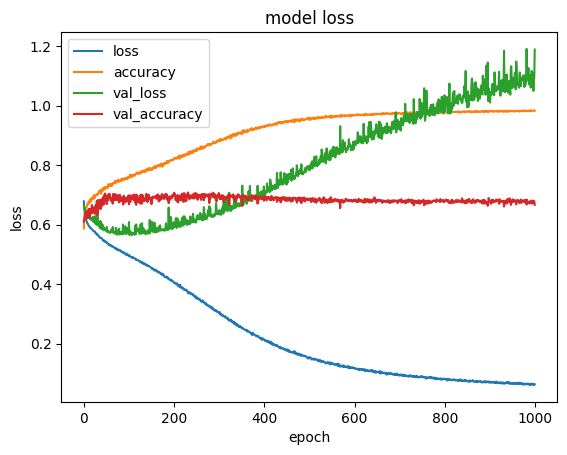

In [31]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_loss'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')
plt.show()

# Saving model

In [32]:
import os
model_name = 'Gender_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at d:\VoiceClone\GenderDetermination\saved_models\Gender_Detection_Model.h5 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import json
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [35]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Gender_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 66.69%


# Predict

In [37]:
preds = loaded_model.predict(x_testcnn)
preds

39/39 [==============================] - 1s 28ms/step


array([[0.07643344, 0.98088497],
       [0.94377756, 0.030874  ],
       [0.48460862, 0.6687119 ],
       ...,
       [0.6409777 , 0.19204599],
       [0.30786636, 0.70945084],
       [0.22702199, 0.93745667]], dtype=float32)

In [38]:
preds1=preds.argmax(axis=1)
preds1

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
pred_flat = preds1.astype(int).flatten()
predictions = (lb.inverse_transform(pred_flat))

In [40]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male
1,female
2,male
3,male
4,female
5,male
6,female
7,female
8,female
9,male


In [41]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [42]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male
1,male
2,male
3,male
4,male
5,male
6,male
7,male
8,female
9,female


In [43]:
finaldf = actualdf.join(preddf)

In [47]:
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(actualdf, preddf)

0.666936790923825